In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale

In [23]:
# Load the dataset
df = pd.read_csv("diabetes.csv")

In [24]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())


First few rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   Pedigree  Age  Outcome  
0     0.627   50        1  
1     0.351   31        0  
2     0.672   32        1  
3     0.167   21        0  
4     2.288   33        1  


In [25]:
# Check for missing values
print("Missing values in the dataset:")
print(df.isnull().sum())

Missing values in the dataset:
Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64


In [26]:
# Summary statistics
print("Summary statistics of the dataset:")
print(df.describe())

Summary statistics of the dataset:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI    Pedigree         Age     Outcome  
count  768.000000  768.000000  768.000000  768.000000  
mean    31.992578    0.471876   33.240885    0.348958  
std      7.884160    0.331329   11.760232    0.476951  
min      0.000000    0.078000   21.000000    0.000000  


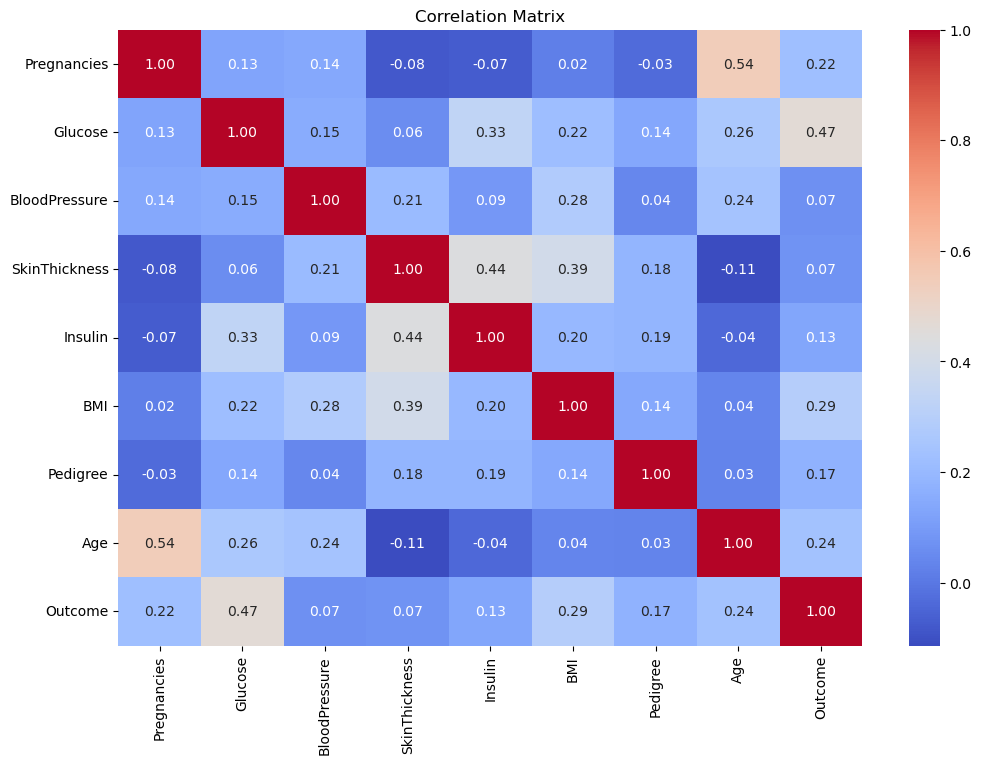

In [27]:
# Data Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

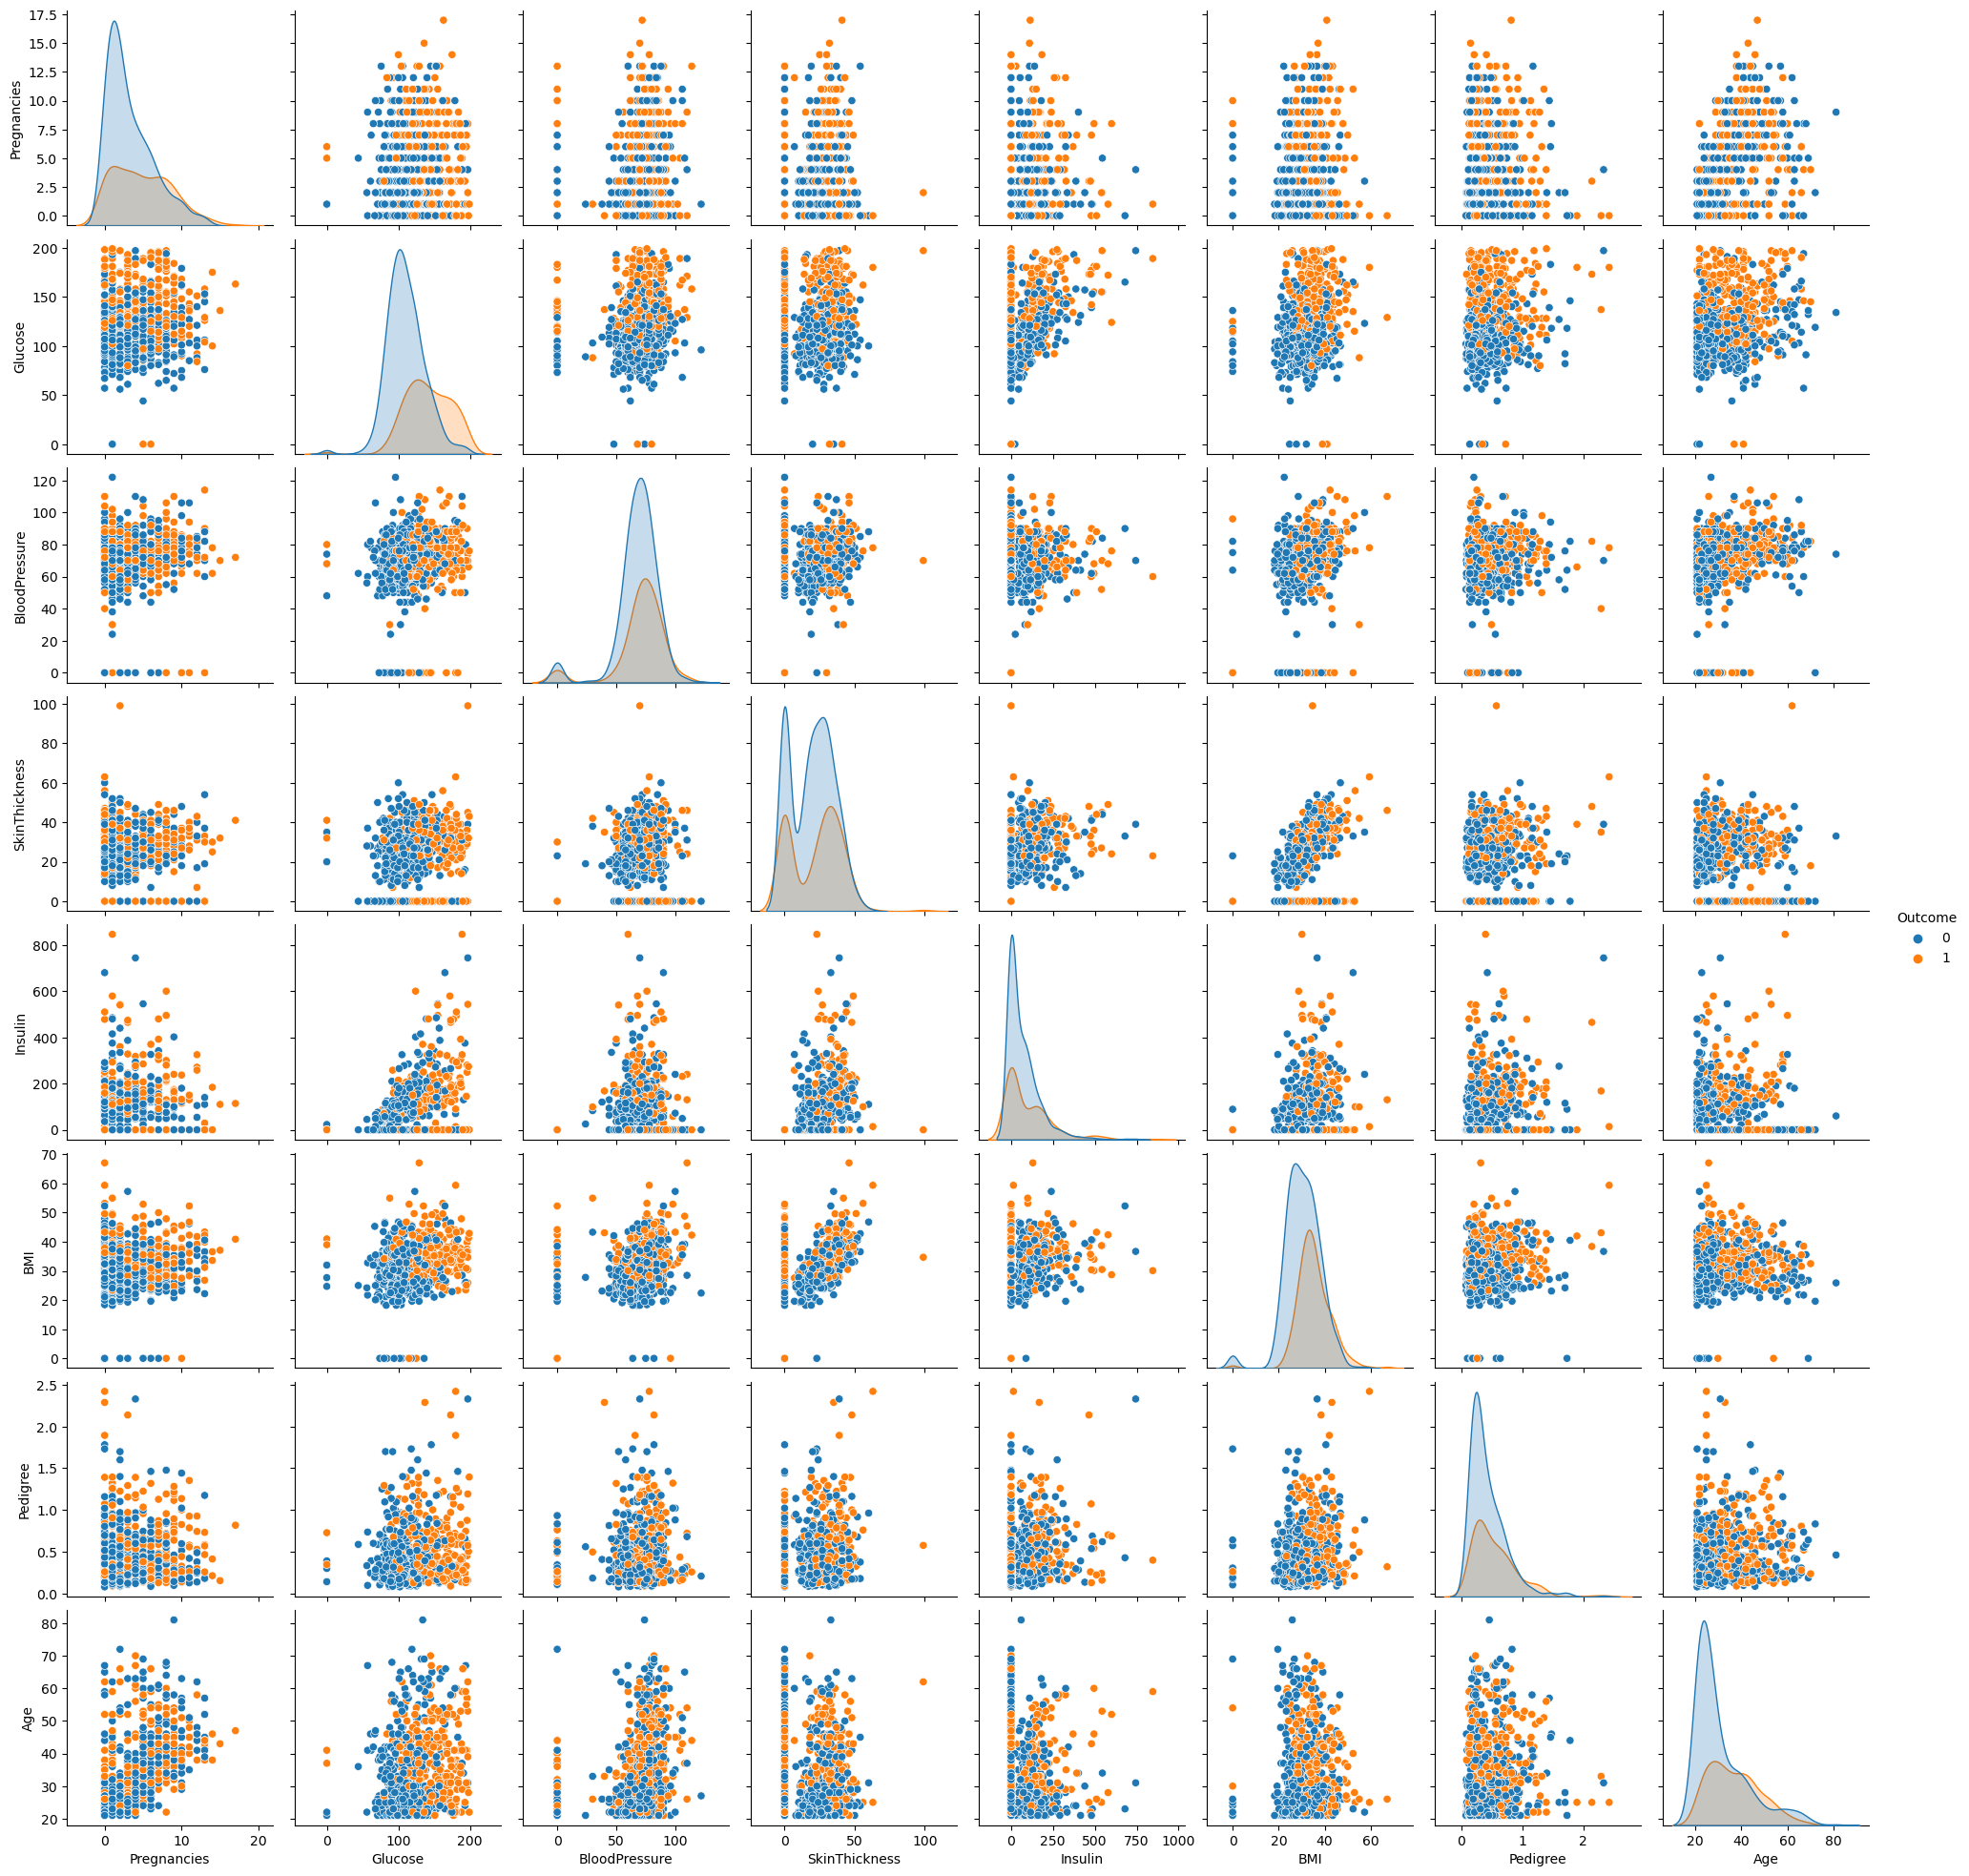

In [28]:
# Pairplot for visualizing relationships between features
sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.show()

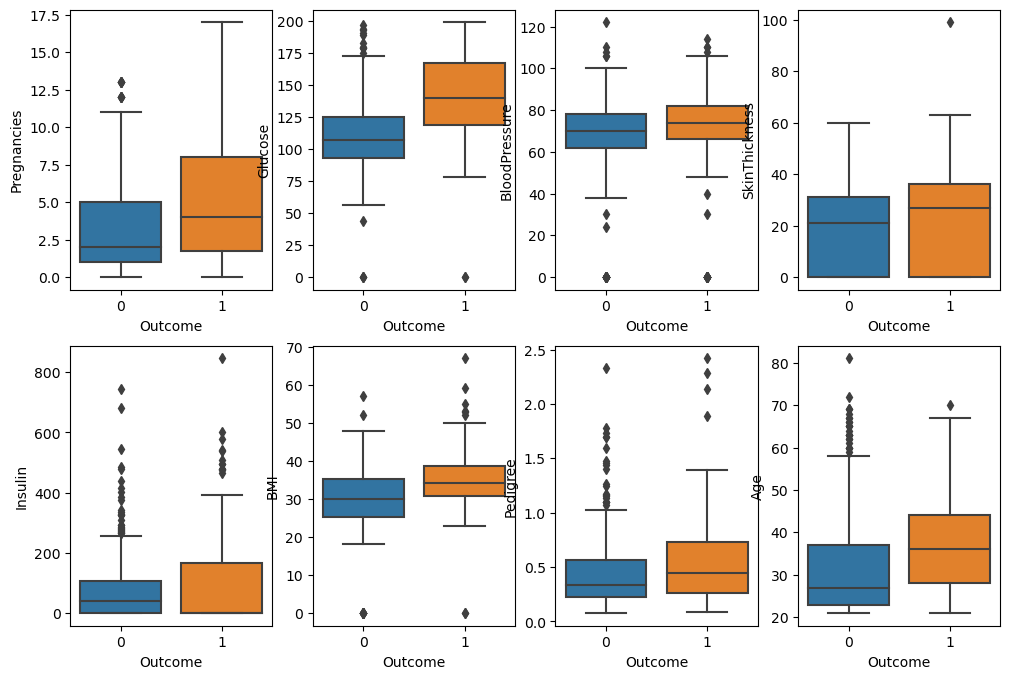

In [29]:
# Box plots to visualize feature distributions
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x='Outcome', y=column, data=df)
plt.show()

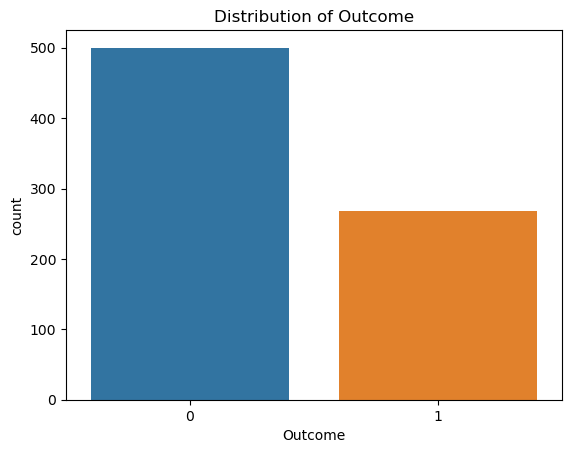

In [30]:
sns.countplot(data=df, x='Outcome')
plt.title("Distribution of Outcome")
plt.show()


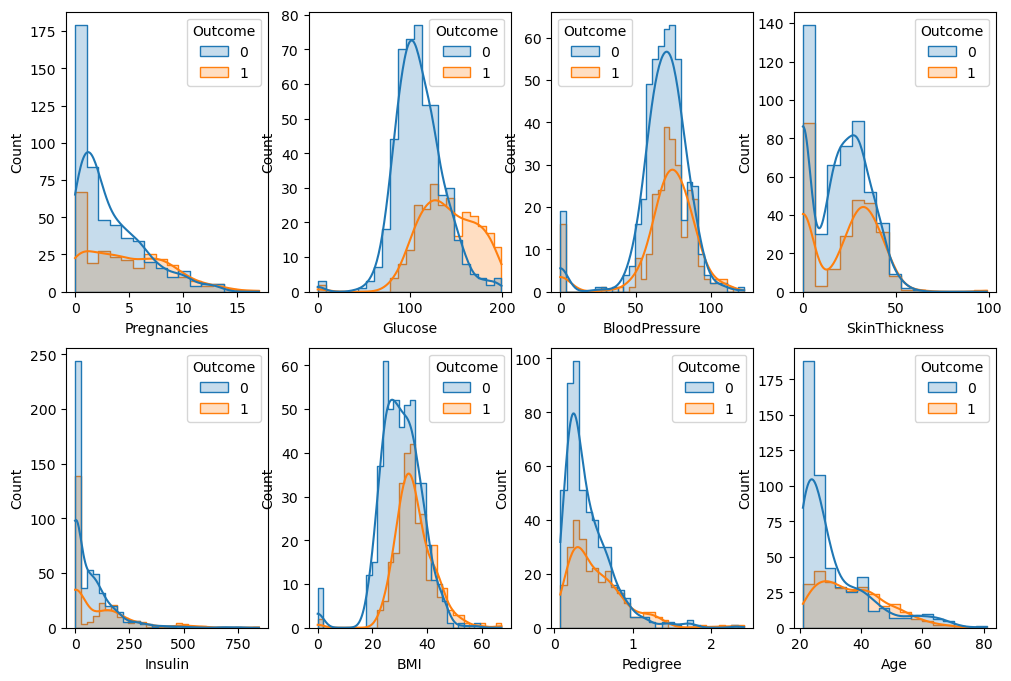

In [31]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 4, i + 1)
    sns.histplot(data=df, x=column, kde=True, hue='Outcome', element="step", common_norm=False)
plt.show()


In [32]:
# Data Preprocessing
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X = scale(X)

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [34]:
# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [35]:
# Model Evaluation
print("Confusion matrix:")
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)


Confusion matrix:
[[123  28]
 [ 37  43]]


In [36]:
total_misclassified = confusion_matrix[0, 1] + confusion_matrix[1, 0]
total_examples = confusion_matrix[0, 0] + confusion_matrix[0, 1] + confusion_matrix[1, 0] + confusion_matrix[1, 1]
error_rate = total_misclassified / total_examples
print("Error rate:", error_rate)
print("Accuracy:", 1 - error_rate)

Error rate: 0.2813852813852814
Accuracy: 0.7186147186147186


In [37]:
print("Precision score:", metrics.precision_score(y_test, y_pred))
print("Recall score:", metrics.recall_score(y_test, y_pred))

Precision score: 0.6056338028169014
Recall score: 0.5375


In [38]:
classification_report = metrics.classification_report(y_test, y_pred)
print("Classification report:")
print(classification_report)

Classification report:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       151
           1       0.61      0.54      0.57        80

    accuracy                           0.72       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.71      0.72      0.71       231



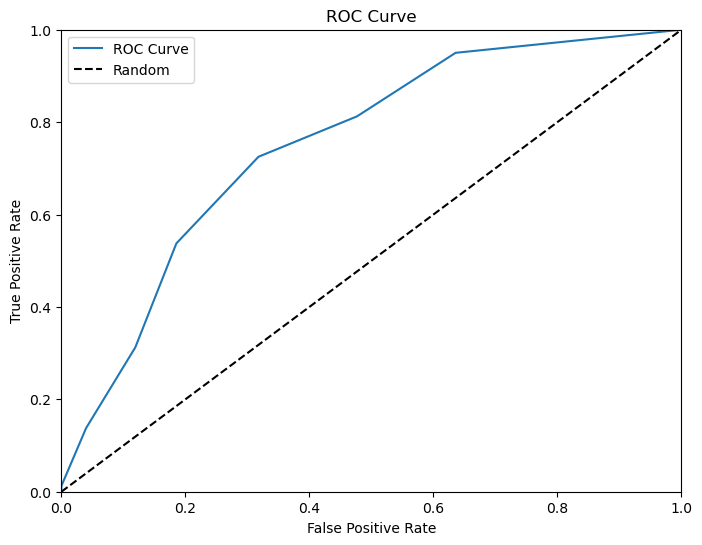

AUC: 0.75


In [39]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

auc = roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc)
